In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("loan_data.csv")
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [8]:
data=data.drop(['Loan_ID'],axis=0)
data.head()

KeyError: "['Loan_ID'] not found in axis"

In [9]:
data.shape()

TypeError: 'tuple' object is not callable

In [10]:
data.shape

(381, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [12]:
#Handling the missing values inthe datsset
data.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#d['Gender']=d['Gender'].fillna(['Gender'].mode().iloc[0])
d['Self_Employed']=d['Self_Employed'].fillna(d['Self_Employed'].mode().iloc[0])
d.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
d.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [25]:
d.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#converting categorical data into numerical form
def cat_to_num(df,c_var):
for i in c_var:
    uniques_value=df[1].unique()
    df[1].replace(uniques_value,[0,1],inplace=True)
for i in ['Property_Area']:
    uniques_ value=df[i].unique()
    df[i].replace(unique_value,[0,1,3],inplace=True)

In [ ]:
c_variables=['Gender','Married','Education','Self_Employed','Loan_Status']
cat_to_num(df,c_variables)

In [26]:
d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360,1,Urban,Y


NameError: name 'c_variables' is not defined

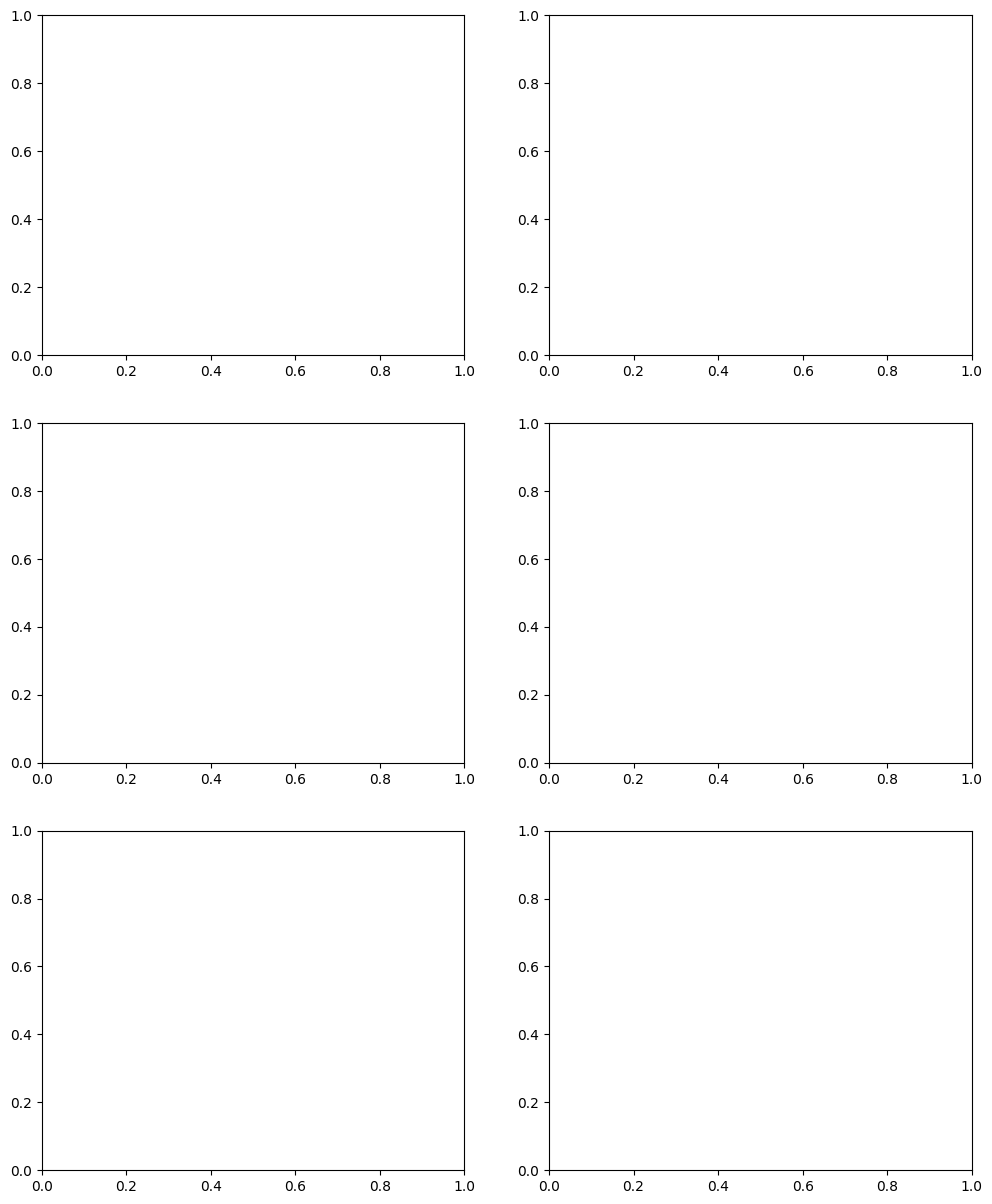

In [33]:
#Data visulization]
#cat_to_num(d,c_variables)
fig,ax=plt.subplots(3,2,figsize=(12,15))
for index,cat_col in enumerate(c_variables):
    row,col =index//2,index%2
    sns.countplot(x=cat_col,data=d,hue='Loan_Status',ax=ax[row,col])
    plt.subplots_adjust(hspace=1)